In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [128]:
# Load only first 50 rows
df_full = pd.read_csv(r"C:\Users\rimjh\Downloads\creditcard.csv.zip")
# Load the full dataset

# Select 49 normal and 1 fraud transaction
normal = df_full[df_full["Class"] == 0].iloc[:49]
fraud = df_full[df_full["Class"] == 1].iloc[:1]

# Combine and shuffle
df = pd.concat([normal, fraud]).sample(frac=1, random_state=42).reset_index(drop=True)

print(df.shape)
print(df['Class'].value_counts())
df.head()

(50, 31)
Class
0    49
1     1
Name: count, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,11.0,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0
1,29.0,1.110880,0.168717,0.517144,1.325407,-0.191573,0.019504,-0.031849,0.117620,0.017665,...,-0.037709,0.095701,-0.048198,0.232115,0.606201,-0.342097,0.036770,0.007480,6.54,0
2,24.0,1.237429,0.061043,0.380526,0.761564,-0.359771,-0.494084,0.006494,-0.133862,0.438810,...,-0.245682,-0.530900,-0.044265,0.079168,0.509136,0.288858,-0.022705,0.011836,17.28,0
3,34.0,1.138316,0.056956,0.649419,0.873062,-0.468466,-0.410195,-0.013898,-0.072440,0.306788,...,-0.164222,-0.247401,0.059405,0.456286,0.361004,0.274414,-0.002498,0.017109,21.34,0
4,13.0,-0.436905,0.918966,0.924591,-0.727219,0.915679,-0.127867,0.707642,0.087962,-0.665271,...,-0.194796,-0.672638,-0.156858,-0.888386,-0.342413,-0.049027,0.079692,0.131024,0.89,0


In [129]:
# Scale 'Amount' and 'Time'
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop original columns
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Reorder columns
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

In [130]:
X = df.drop('Class', axis=1)
y = df['Class']

# If there are not enough fraud cases, you might get an error during split
# So we use stratify only if there are both 0 and 1 in target
class_counts = y.value_counts()
if len(class_counts) >= 2 and all(class_counts >= 2):
    stratify = y
else:

    stratify = None
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=stratify, random_state=42)

In [131]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [132]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

#print("Classification Report:\n",(y_test, y_pred, labels=[0, 1])
print('Classification Report:\n', classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

if len(np.unique(y_test)) > 1:
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
else:
    print("ROC curve not plotted due to only one class present in y_test.")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Confusion Matrix:
 [[10]]
ROC curve not plotted due to only one class present in y_test.


C:\Users\rimjh\.anaconda\rimjhimkumari\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [133]:
df.describe()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,5.000000e+01,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2.886580e-17,4.468648e-17,-0.149565,0.157078,0.901050,0.385649,0.029165,0.283818,-0.077770,0.051369,...,-0.148113,0.066910,0.054296,0.032919,0.026749,0.178092,-0.074080,0.053840,0.040147,0.020000
std,1.010153e+00,1.010153e+00,1.393700,1.123616,0.875560,1.221147,1.104860,1.162854,0.746471,0.803091,...,0.427055,0.464069,0.506186,0.457522,0.555073,0.359214,0.416448,0.241542,0.223840,0.141421
min,-5.655218e-01,-4.811994e-01,-5.401258,-5.450148,-1.609851,-1.875663,-1.971383,-1.763406,-2.537387,-3.807864,...,-2.196848,-0.579526,-1.015455,-0.465211,-1.371866,-0.767315,-0.835203,-1.206921,-1.085339,0.000000
25%,-4.892270e-01,-2.956353e-01,-0.861278,-0.122312,0.396586,-0.437031,-0.603540,-0.263226,-0.545270,-0.067611,...,-0.272105,-0.190362,-0.262919,-0.157958,-0.330938,-0.037133,-0.341002,-0.007362,0.005121,0.000000
50%,-3.211643e-01,-8.291547e-02,-0.314901,0.271908,1.036794,0.406521,-0.154583,0.086983,-0.022873,0.116801,...,-0.126122,-0.021459,0.085057,-0.070257,0.073048,0.164152,-0.203078,0.042404,0.023764,0.000000
75%,-6.924227e-02,7.603602e-03,1.113227,0.865268,1.351076,1.198487,0.420388,0.408913,0.527039,0.348155,...,0.050982,0.074679,0.253342,0.014297,0.381376,0.458435,0.143711,0.132919,0.091230,0.000000
max,5.221121e+00,6.868949e+00,1.492936,2.198527,2.746261,3.997906,3.049106,3.721818,1.120631,1.530817,...,0.524980,1.943465,1.353650,2.458589,1.112970,0.820591,1.196549,0.707519,0.949594,1.000000


In [134]:
df['Class'].value_counts()

Class
0    49
1     1
Name: count, dtype: int64

In [135]:
df.isnull().sum()

scaled_amount    0
scaled_time      0
V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
Class            0
dtype: int64

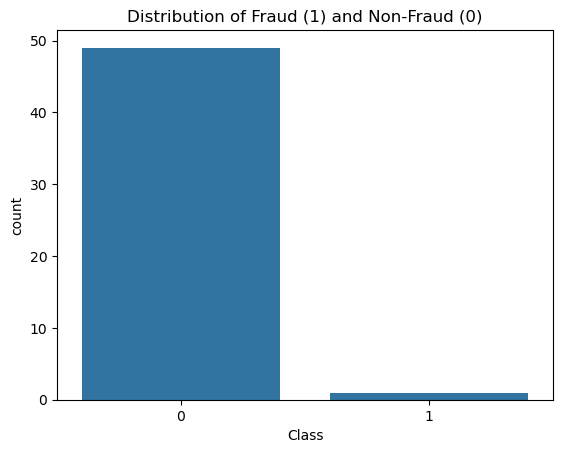

In [136]:

sns.countplot(data=df, x='Class')
plt.title('Distribution of Fraud (1) and Non-Fraud (0)')
plt.show()

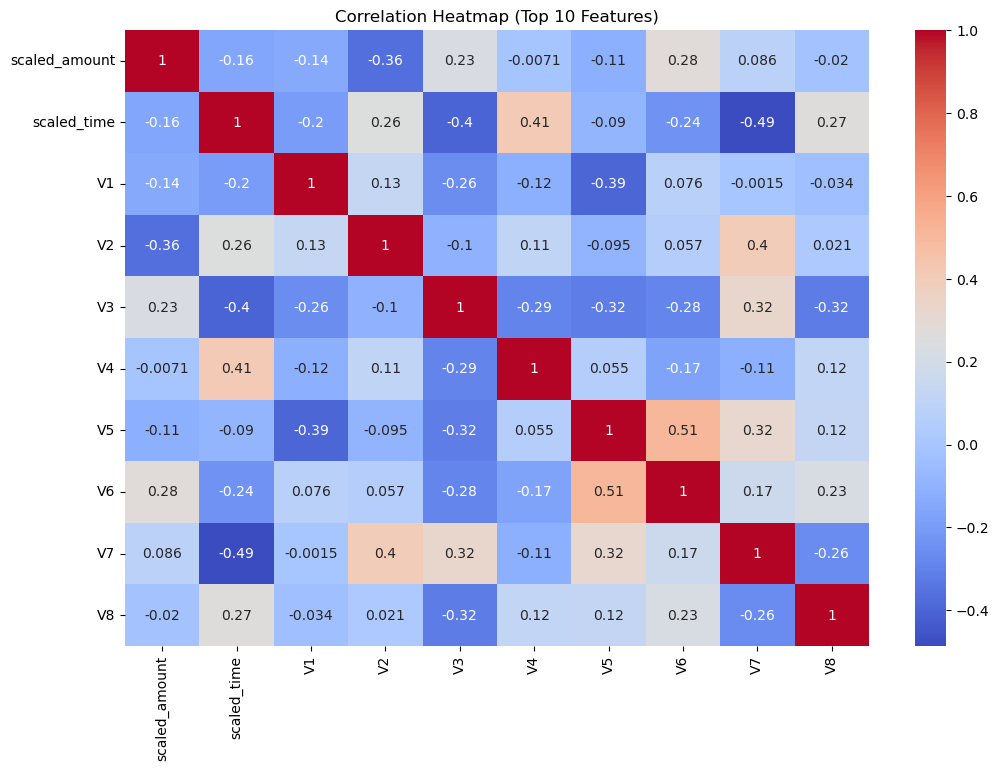

In [137]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr().iloc[:10, :10], annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Top 10 Features)")
plt.show()

In [138]:
print(df.columns)

Index(['scaled_amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Class'],
      dtype='object')


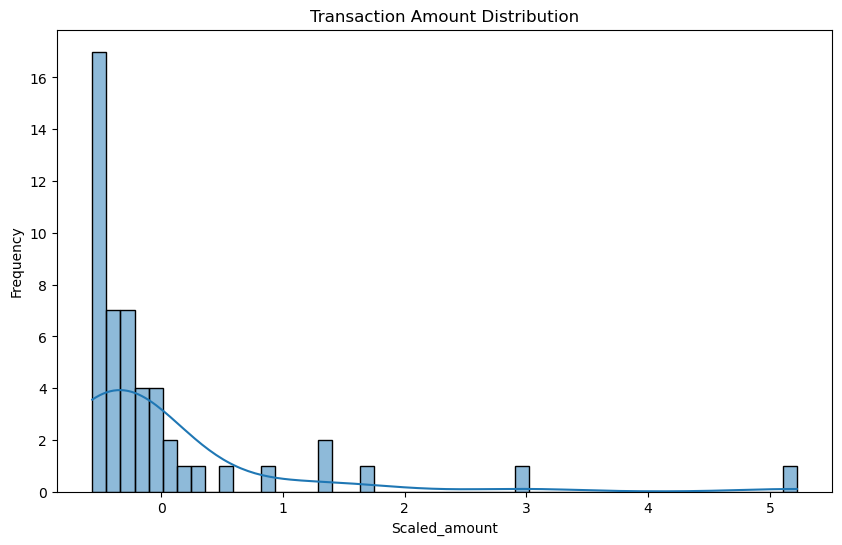

In [139]:
plt.figure(figsize=(10, 6))
sns.histplot(df['scaled_amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Scaled_amount")
plt.ylabel("Frequency")
plt.show()

In [140]:
df['normamount'] = StandardScaler().fit_transform(df['scaled_amount'].values.reshape(-1, 1))
df['normtime'] = StandardScaler().fit_transform(df['scaled_time'].values.reshape(-1, 1))
df = df.drop(['scaled_amount', 'scaled_time'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,normamount,normtime
0,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,0.460230,...,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,0,-0.145270,-0.282057
1,1.110880,0.168717,0.517144,1.325407,-0.191573,0.019504,-0.031849,0.117620,0.017665,0.044865,...,0.095701,-0.048198,0.232115,0.606201,-0.342097,0.036770,0.007480,0,-0.465578,0.043811
2,1.237429,0.061043,0.380526,0.761564,-0.359771,-0.494084,0.006494,-0.133862,0.438810,-0.207358,...,-0.530900,-0.044265,0.079168,0.509136,0.288858,-0.022705,0.011836,0,-0.301451,-0.046708
3,1.138316,0.056956,0.649419,0.873062,-0.468466,-0.410195,-0.013898,-0.072440,0.306788,-0.269953,...,-0.247401,0.059405,0.456286,0.361004,0.274414,-0.002498,0.017109,0,-0.239406,0.134330
4,-0.436905,0.918966,0.924591,-0.727219,0.915679,-0.127867,0.707642,0.087962,-0.665271,-0.737980,...,-0.672638,-0.156858,-0.888386,-0.342413,-0.049027,0.079692,0.131024,0,-0.551921,-0.245850


In [141]:
print("Train set class distribution:\n", y_train.value_counts())
print("Test set class distribution:\n", y_test.value_counts())

Train set class distribution:
 Class
0    39
1     1
Name: count, dtype: int64
Test set class distribution:
 Class
0    10
Name: count, dtype: int64


C:\Users\rimjh\.anaconda\rimjhimkumari\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


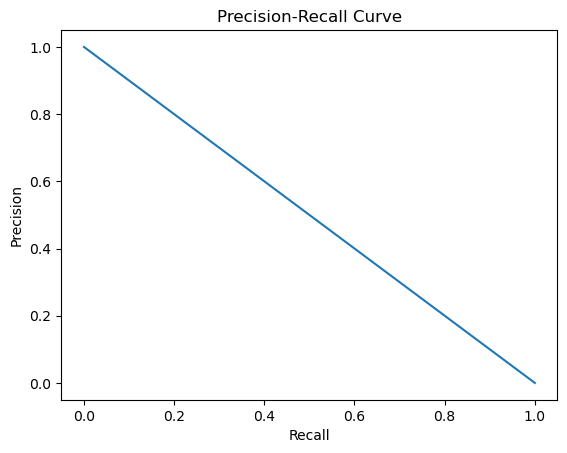

In [142]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [143]:
iso = IsolationForest(contamination=0.001, random_state=42)
y_pred_if = iso.fit_predict(X)
# Anomalies = -1
print(pd.Series(y_pred_if).value_counts())

 1    49
-1     1
Name: count, dtype: int64


In [145]:
missing = df.isnull().sum()
print("Missing values in each column:\n", missing[missing > 0])

Missing values in each column:
 Series([], dtype: int64)


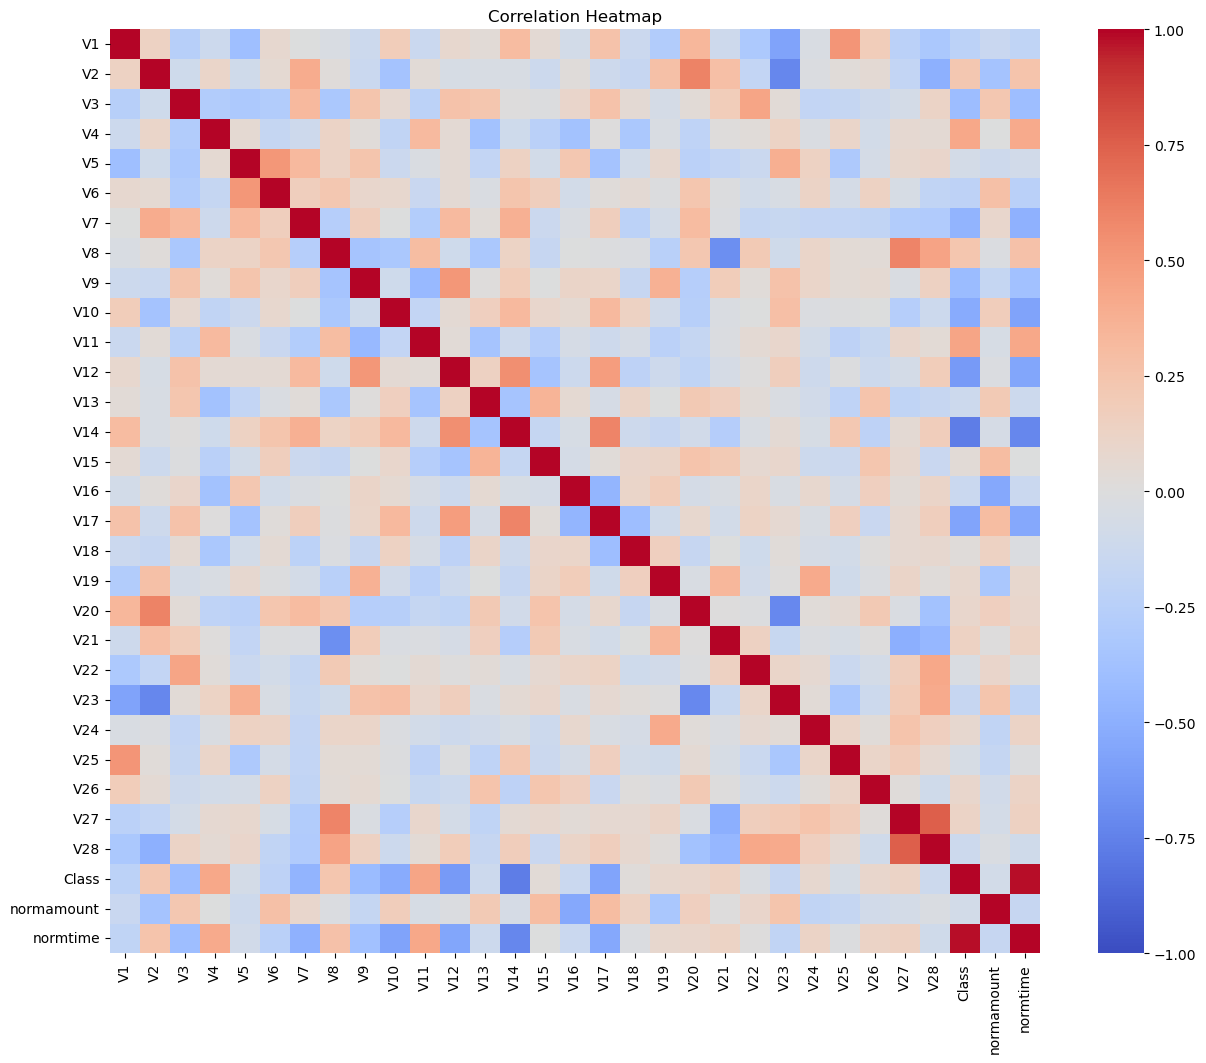

In [146]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), cmap='coolwarm', vmax=1.0, vmin=-1.0)
plt.title("Correlation Heatmap")
plt.show()

C:\Users\rimjh\.anaconda\rimjhimkumari\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


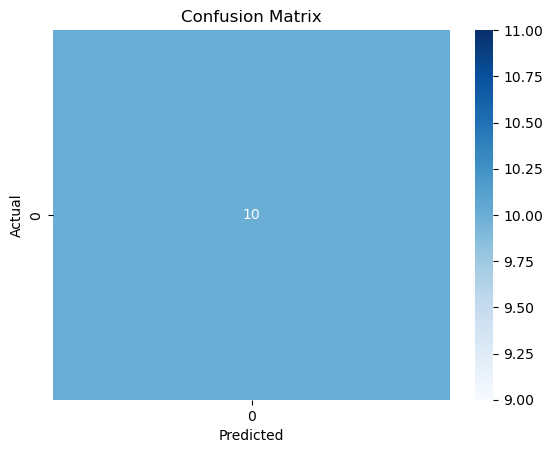

In [147]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

In [148]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



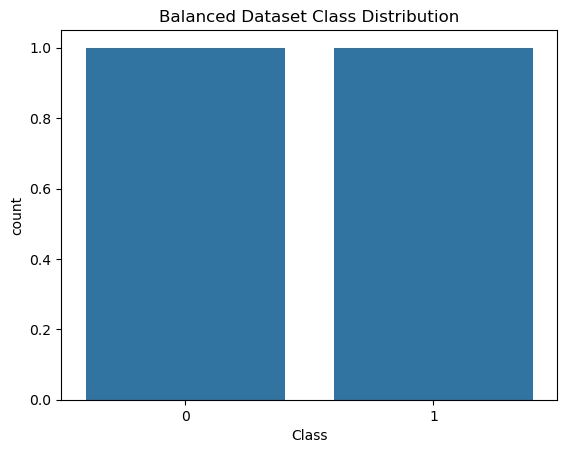

In [149]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0].sample(n=len(fraud), random_state=42)

balanced_df = pd.concat([fraud, non_fraud])
sns.countplot(x='Class', data=balanced_df)
plt.title("Balanced Dataset Class Distribution")
plt.show()

Most correlated feature with Class: 0.9812784901758962


C:\Users\rimjh\AppData\Local\Temp\ipykernel_856\494308623.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  top_corr = df.corr()['Class'].abs().sort_values(ascending=False)[1]  # skip 'Class' itself


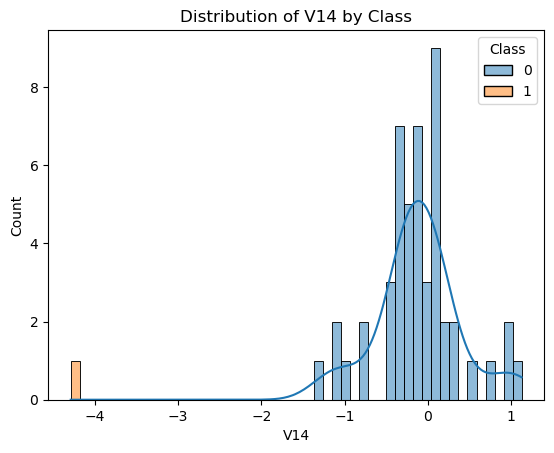

In [150]:
top_corr = df.corr()['Class'].abs().sort_values(ascending=False)[1]  # skip 'Class' itself
print("Most correlated feature with Class:", top_corr)

sns.histplot(data=df, x='V14', hue='Class', kde=True, bins=50)
plt.title("Distribution of V14 by Class")
plt.show()

C:\Users\rimjh\AppData\Local\Temp\ipykernel_856\2161088272.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Class', palette=['green', 'red'])


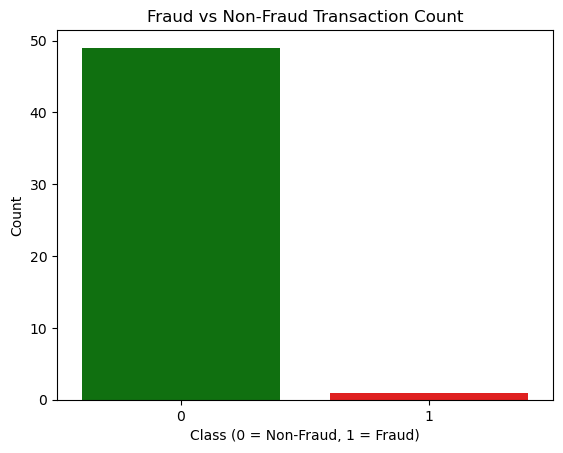

In [151]:
sns.countplot(data=df, x='Class', palette=['green', 'red'])
plt.title('Fraud vs Non-Fraud Transaction Count')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

In [152]:
correlation = df.corr()['Class'].drop('Class')
top_features = correlation.abs().sort_values(ascending=False).head(5)
print("Top 5 features most correlated with fraud:\n")
print(top_features)

Top 5 features most correlated with fraud:

normtime    0.981278
V14         0.767505
V12         0.617780
V17         0.565792
V10         0.527322
Name: Class, dtype: float64


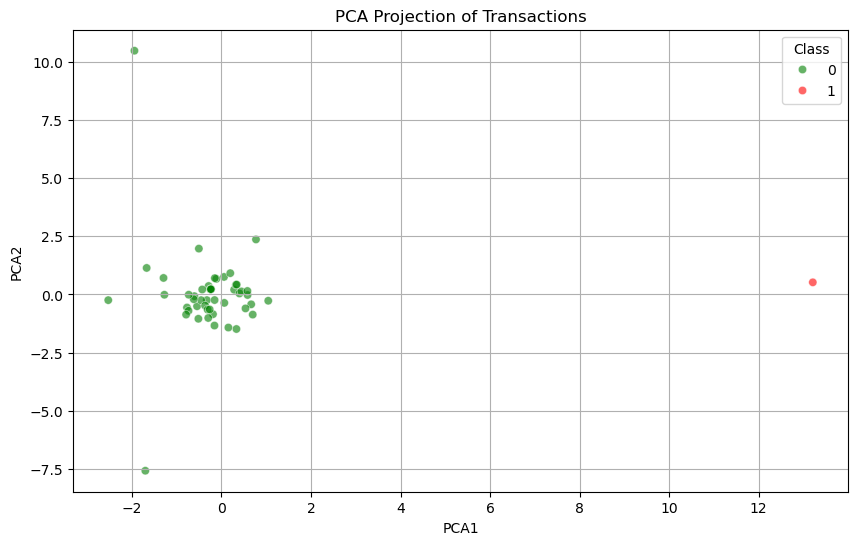

In [153]:
# Normalize data
features = df.drop(columns=['Class'])
scaled_features = StandardScaler().fit_transform(features)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
df_pca['Class'] = df['Class']

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Class', alpha=0.6, palette={0: 'green', 1: 'red'})
plt.title('PCA Projection of Transactions')
plt.grid(True)
plt.show()